<h2 id="exercises">Decision Tree Exercises</h2>

Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:


In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle
import eval

import graphviz
from graphviz import Graph

In [2]:
titanic_train, titanic_validate, titanic_test = wrangle.wrangle_titanic()

In [3]:
print(f'Tain: {titanic_train.shape}')
print(f'Validate: {titanic_validate.shape}')
print(f'Test: {titanic_test.shape}')

Tain: (498, 12)
Validate: (214, 12)
Test: (179, 12)


In [4]:
titanic_train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,4,1,39.6875,Southampton,0,1,0,1
259,259,1,2,female,0,1,26.0000,Southampton,0,0,0,1
306,306,1,1,female,0,0,110.8833,Cherbourg,1,0,0,0


In [5]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = titanic_train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = titanic_train.survived

X_validate = titanic_validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = titanic_validate.survived

X_test = titanic_test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = titanic_test.survived

In [6]:
X_train.shape

(498, 9)

1. <p>What is your baseline prediction? What is your baseline accuracy? <em>remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.</em></p>

In [7]:
# Most people died, so a baseline prediation of everyone dying is a valid starting point

baseline = y_train.mode()

match_baseline = y_train == 0

baseline_accuracy = match_baseline.mean()

print(f'Baseline accuracy : {baseline_accuracy}')

Baseline accuracy : 0.6164658634538153


2. <p>Fit the decision tree classifier to your training sample and transform (i.e.  make predictions on the training sample)</p>



In [8]:
# Adam review

tree1 = DecisionTreeClassifier(max_depth=1, random_state=123)

tree1 = tree1.fit(X_train, y_train)

y_predictions = tree1.predict(X_train)

In [9]:
pd.DataFrame(confusion_matrix(y_train, y_predictions))

,0,1
0,265,42
1,58,133


In [10]:
report = classification_report(y_train, y_predictions, output_dict=True)
print('Depth 1 tree')
pd.DataFrame(report)

Depth 1 tree


,0,1,accuracy,macro avg,weighted avg
precision,0.820433,0.760000,0.799197,0.790217,0.797255
recall,0.863192,0.696335,0.799197,0.779764,0.799197
f1-score,0.841270,0.726776,0.799197,0.784023,0.797358
support,307.000000,191.000000,0.799197,498.000000,498.000000


In [11]:
# Create the Decision Tree object with desired hyper-parameters.
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [12]:
# Fit the model (i.e. apply the algorithm to your unique set of data so that the algorithm can identify a pattern)
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

In [13]:
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

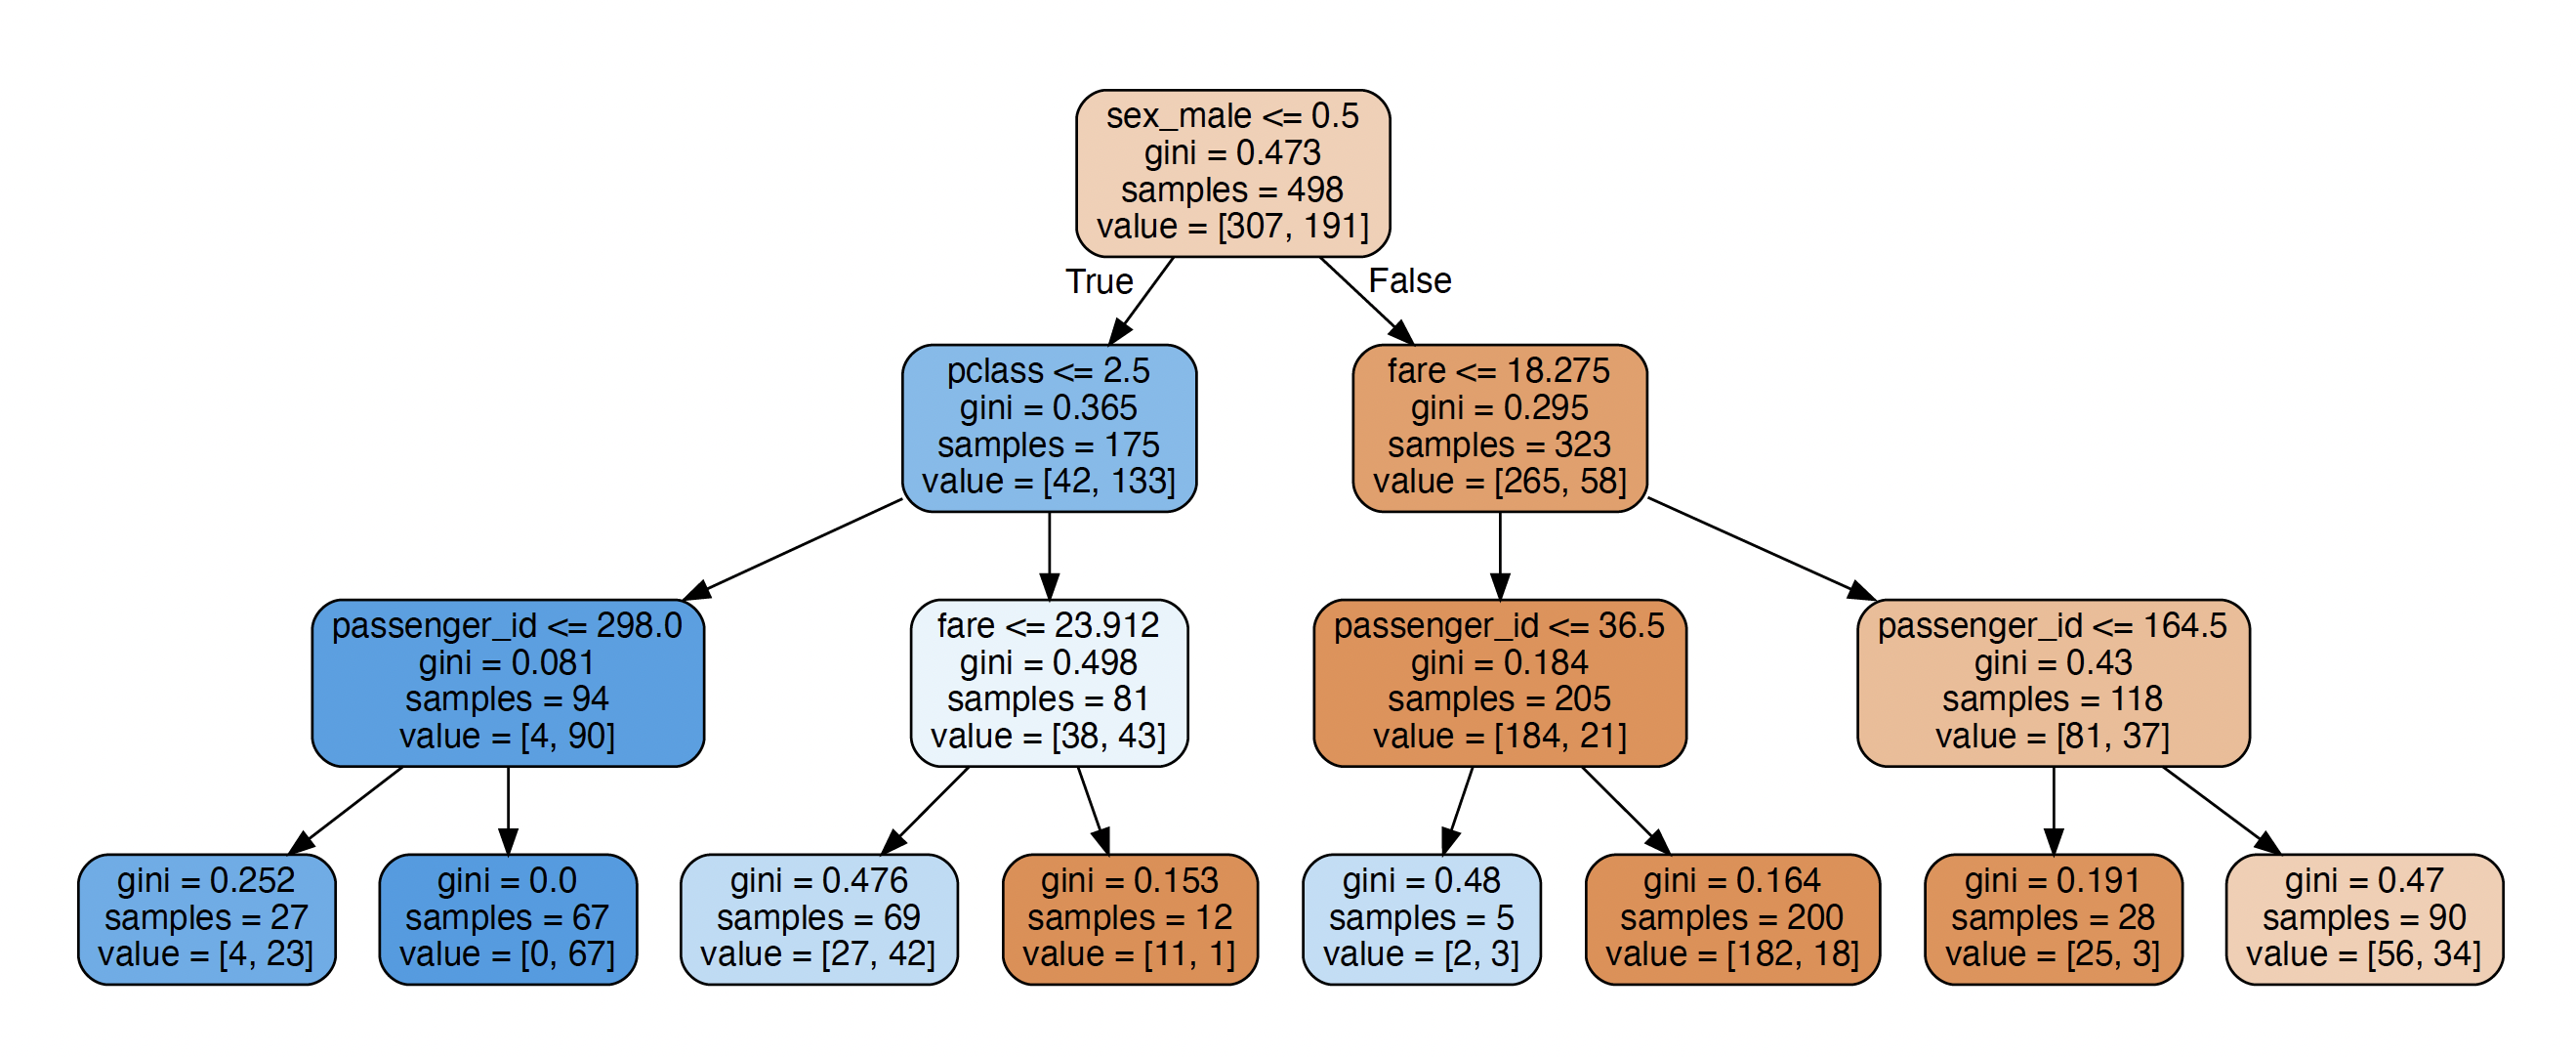

In [14]:
from IPython.display import Image
Image('titanic_decision_1.png')

3. <p>Evaluate your in-sample results using the model score, confusion matrix, and classification report.</p>


In [15]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [16]:
# Estimate probabilities of survival

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.62222222, 0.37777778],
       [0.62222222, 0.37777778],
       [0.89285714, 0.10714286],
       [0.14814815, 0.85185185],
       [0.        , 1.        ]])

In [17]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


In [18]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[274,  33],
       [ 56, 135]])

In [19]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [20]:
labels = sorted(y_train.unique())
print('Actual on the left, predicted on the top')
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

Actual on the left, predicted on the top


,0,1
0,274,33
1,56,135


In [21]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       307
           1       0.80      0.71      0.75       191

    accuracy                           0.82       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498



4. <p>Compute:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.</p>


In [24]:
TP = 265
FP = 58
FN = 42
TN = 133
ALL = TP + FP + FN + TN


In [25]:
m1_precision, m1_accuracy, m1_npv, m1_specificity, m1_recall, m1_f1 = eval.mod_eval(TP, TN, FP, FN)

print(f'Model 1 Precision: {m1_precision}')
print(f'Model 1 Accuracy:  + {m1_accuracy}')
print(f'Model 1 NPV:  + {m1_npv}')
print(f'Model 1 Specificity: + {m1_specificity}')
print(f'Model 1 Recall: + {m1_recall}')
print(f'Model 1 F1: + {m1_f1}')

Model 1 Precision: 0.8204334365325078
Model 1 Accuracy:  + 0.8631921824104235
Model 1 NPV:  + 0.6963350785340314
Model 1 Specificity: + 0.76
Model 1 Recall: + 0.7991967871485943
Model 1 F1: + 0.8412698412698413


---

5. <p>Run through steps 2-4 using a different <code>max_depth</code> value.</p>


In [26]:
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

clf = clf.fit(X_train, y_train)

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree_depth5', view=True)

'titanic_decision_tree_depth5.pdf'

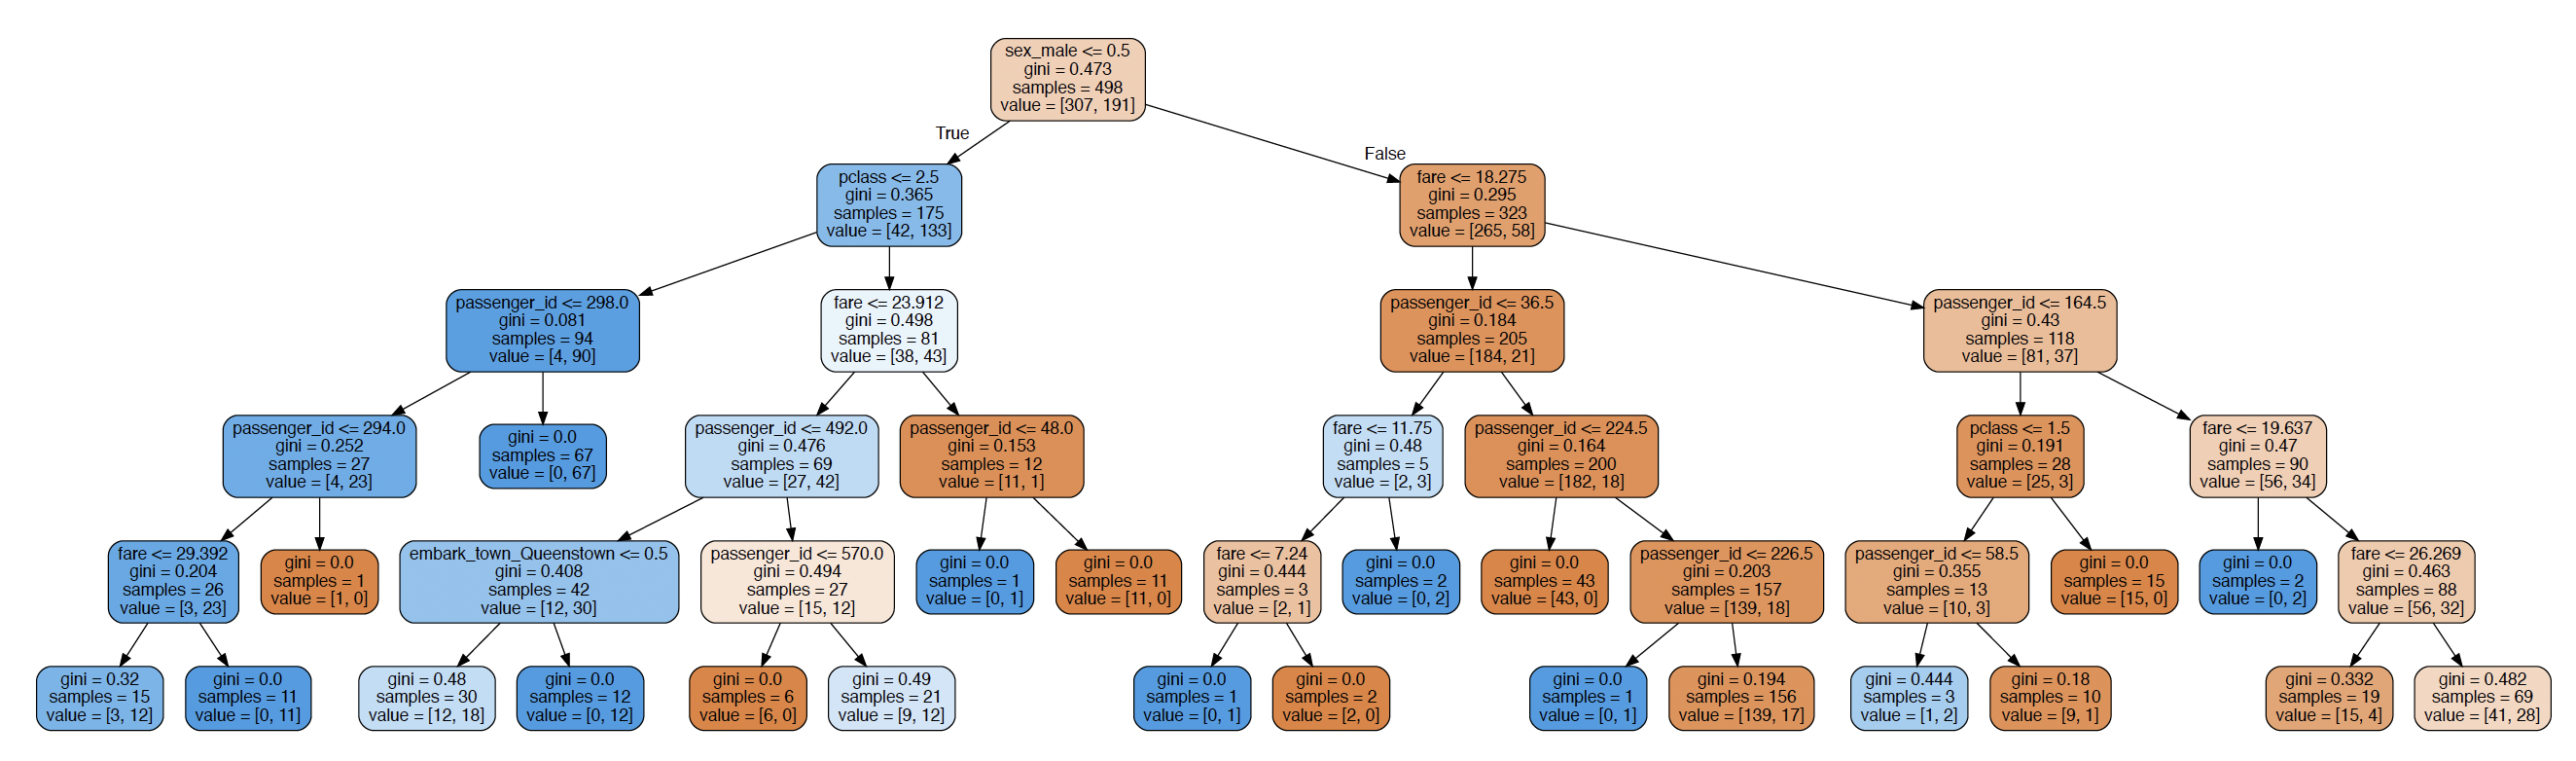

In [27]:
from IPython.display import Image
Image('titanic_tree_5.png')

In [28]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [29]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.5942029 , 0.4057971 ],
       [0.78947368, 0.21052632],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       [0.        , 1.        ]])

In [30]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.85


In [31]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[282,  25],
       [ 50, 141]])

In [32]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [33]:
labels = sorted(y_train.unique())
print('Actual on the left, predicted on the top')
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

Actual on the left, predicted on the top


,0,1
0,282,25
1,50,141


In [34]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       307
           1       0.85      0.74      0.79       191

    accuracy                           0.85       498
   macro avg       0.85      0.83      0.84       498
weighted avg       0.85      0.85      0.85       498



In [35]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       132
           1       0.72      0.62      0.67        82

    accuracy                           0.76       214
   macro avg       0.75      0.74      0.74       214
weighted avg       0.76      0.76      0.76       214



In [36]:
# ADAM Max depth loop

for i in range(2, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print('-----------------')

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000
-----------------
Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.830303    0.803571  0.821285    0.816937      0.820051
recall       0.892508    0.706806  0.821285    0.799657      0.821285
f1-score     0.860283    0.752089  0.821285    0.806186      0.818787
support    307.000000  191.000000  0.821285  498.000000    498.000000
-----------------
Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.815642    0.892857  0.837349    0.854250      0.845257
recall       0.951140    0.654450  0.837349    0.

6. <p>Which model performs better on your in-sample data?</p>


No improvement after depth of 15, but this model likely overfit

7. <p>Which model performs best on your out-of-sample data, the <code>validate</code> set?</p>


In [37]:
# Adam loop in sample and out of sample

metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.799197,0.761682,0.037515
1,3,0.821285,0.775701,0.045584
2,4,0.837349,0.761682,0.075667
3,5,0.849398,0.761682,0.087715
4,6,0.871486,0.738318,0.133168
5,7,0.893574,0.752336,0.141238
6,8,0.913655,0.733645,0.180010
7,9,0.935743,0.724299,0.211444
8,10,0.947791,0.728972,0.218819
9,11,0.959839,0.724299,0.235540


In [38]:
# The greater the difference between valitate and train accuracy, the more overfit the model is

# We wish to balance and simultaneously optimize maximum validate_accuracy with minimum difference

df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
1,3,0.821285,0.775701,0.045584
0,2,0.799197,0.761682,0.037515
2,4,0.837349,0.761682,0.075667
3,5,0.849398,0.761682,0.087715


A depth of three seems to give us the highest validation accuracy with the least overfitting

---

1. Work through these same exercises using the Telco dataset.



2. Experiment with this model on other datasets with a higher number of output classes.


---

## Random Forest Exercises

Continue working in your `model` file with titanic data to do the following: 


In [45]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

In [46]:
titanic_train, titanic_validate, titanic_test = wrangle.wrangle_titanic()

In [47]:
print(f'Tain: {titanic_train.shape}')
print(f'Validate: {titanic_validate.shape}')
print(f'Test: {titanic_test.shape}')

Tain: (498, 12)
Validate: (214, 12)
Test: (179, 12)


In [48]:
titanic_train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,4,1,39.6875,Southampton,0,1,0,1
259,259,1,2,female,0,1,26.0000,Southampton,0,0,0,1
306,306,1,1,female,0,0,110.8833,Cherbourg,1,0,0,0


In [49]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = titanic_train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = titanic_train.survived

X_validate = titanic_validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = titanic_validate.survived

X_test = titanic_test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = titanic_test.survived

In [50]:
X_train.shape

(498, 9)

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.


In [52]:
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth=10, 
                            random_state=123)

In [53]:
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [55]:
print(rf.feature_importances_)

[0.23385239 0.09052441 0.05149459 0.03453432 0.22859942 0.02186412
 0.30248482 0.0108785  0.02576743]


In [56]:
y_pred = rf.predict(X_train)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [57]:
y_pred_proba = rf.predict_proba(X_train)

2. Evaluate your results using the model score, confusion matrix, and classification report.


In [58]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [59]:
print(confusion_matrix(y_train, y_pred))

[[307   0]
 [ 15 176]]


In [60]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       307
           1       1.00      0.92      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498




3. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [63]:
confusion_matrix(y_train, y_pred)

array([[307,   0],
       [ 15, 176]])

In [71]:
tp = confusion_matrix(y_train, y_pred)[0][0]
tn = confusion_matrix(y_train, y_pred)[1][1]
fp = confusion_matrix(y_train, y_pred)[0][1]
fn = confusion_matrix(y_train, y_pred)[1][0]



In [72]:
m1_precision, m1_accuracy, m1_npv, m1_specificity, m1_recall, m1_f1 = eval.mod_eval(tp, tn, fp, fn)

print(f'Model 1 Precision: {m1_precision}')
print(f'Model 1 Accuracy:  + {m1_accuracy}')
print(f'Model 1 NPV:  + {m1_npv}')
print(f'Model 1 Specificity: + {m1_specificity}')
print(f'Model 1 Recall: + {m1_recall}')
print(f'Model 1 F1: + {m1_f1}')

Model 1 Precision: 1.0
Model 1 Accuracy:  + 0.953416149068323
Model 1 NPV:  + 1.0
Model 1 Specificity: + 0.9214659685863874
Model 1 Recall: + 0.9698795180722891
Model 1 F1: + 0.9761526232114468


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 


In [74]:

metrics = []

for i in range(1, 11):
    # Make the model
    rf = RandomForestClassifier(min_samples_leaf = i, max_depth=(11-i), random_state=123)

    # Fit the model (on train and only train)
    rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = rf.score(X_train, y_train)
    
    out_of_sample_accuracy = rf.score(X_validate, y_validate)

    output = {
        "min_samples_leaf": i,
        "max_depth": (11-i),
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,10,0.969880,0.771028,0.198851
1,2,9,0.923695,0.785047,0.138648
2,3,8,0.903614,0.785047,0.118568
3,4,7,0.875502,0.785047,0.090455
4,5,6,0.863454,0.771028,0.092426
5,6,5,0.855422,0.789720,0.065702
6,7,4,0.829317,0.789720,0.039598
7,8,3,0.831325,0.794393,0.036933
8,9,2,0.819277,0.775701,0.043576
9,10,1,0.777108,0.757009,0.020099



5.  What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?

In [75]:
# The greater the difference between valitate and train accuracy, the more overfit the model is

# We wish to balance and simultaneously optimize maximum validate_accuracy with minimum difference

df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,min_samples_leaf,max_depth,train_accuracy,validate_accuracy,difference
7,8,3,0.831325,0.794393,0.036933
6,7,4,0.829317,0.789720,0.039598
5,6,5,0.855422,0.789720,0.065702
3,4,7,0.875502,0.785047,0.090455
8,9,2,0.819277,0.775701,0.043576
4,5,6,0.863454,0.771028,0.092426
9,10,1,0.777108,0.757009,0.020099



After making a few models, which one has the best performance (or closest metrics) on both train and validate?

Min sample leaf 8 max depth 3